In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import layers
import tqdm
from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise
from skimage.filters import gaussian
import skimage.io as io

## Original Dataset EDA

In [2]:
train_dir = "FER-2013/train/"
test_dir = "FER-2013/test/"

In [3]:
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   horizontal_flip = True,
                                   rescale = 1./255,
                                   zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
print(train_datagen)

In [5]:
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (48,48),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
test_data = test_datagen.flow_from_directory(test_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7338 images belonging to 7 classes.


In [6]:
dtrain = {}
dtest = {}
for exp_class in os.listdir(train_dir):
    dtrain[exp_class] = len(os.listdir(train_dir + exp_class))
    dtest[exp_class] = len(os.listdir(test_dir + exp_class))
dtrain,dtest

({'angry': 3995,
  'disgust': 436,
  'fear': 4097,
  'happy': 7215,
  'neutral': 4965,
  'sad': 4830,
  'surprise': 3171},
 {'angry': 958,
  'disgust': 111,
  'fear': 1024,
  'happy': 1854,
  'neutral': 1233,
  'sad': 1327,
  'surprise': 831})

In [7]:
train_data_counts = pd.DataFrame(dtrain,index=['train'])
test_data_counts = pd.DataFrame(dtest,index=['test'])
print(train_data_counts)
print(test_data_counts)

       angry  disgust  fear  happy  neutral   sad  surprise
train   3995      436  4097   7215     4965  4830      3171
      angry  disgust  fear  happy  neutral   sad  surprise
test    958      111  1024   1854     1233  1327       831


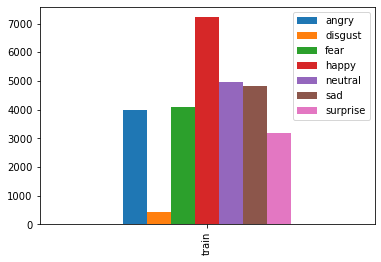

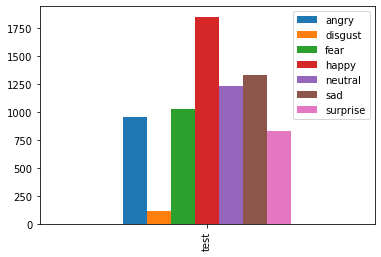

In [8]:
train_data_counts.plot(kind='bar')
test_data_counts.plot(kind='bar')
plt.show()

We have imbalanced classes, disgust has a very low count whereas happy has 15 times more samples than disgust
To deal with this we can have oversampling or undersampling or SMOTE
https://neptune.ai/blog/how-to-deal-with-imbalanced-classification-and-regression-data


In [9]:
for exp_class in os.listdir(train_dir):
    img = cv2.imread((train_dir + exp_class +'/'+ os.listdir(train_dir + exp_class)[0]))
    h,w = img.shape[:2]
    print(exp_class,h,w)

angry 48 48
disgust 48 48
fear 48 48
happy 48 48
neutral 48 48
sad 48 48
surprise 48 48


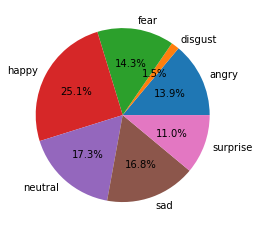

In [10]:
plt.pie(dtrain.values(),
        labels=dtrain.keys(),
        autopct='%1.1f%%')
plt.show()

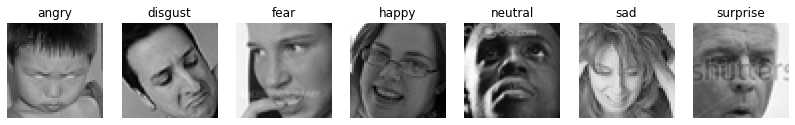

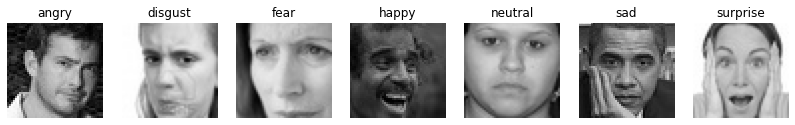

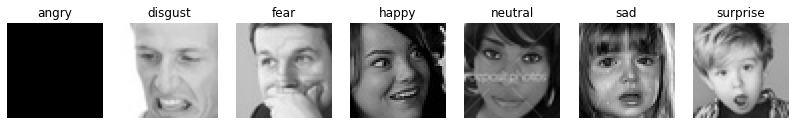

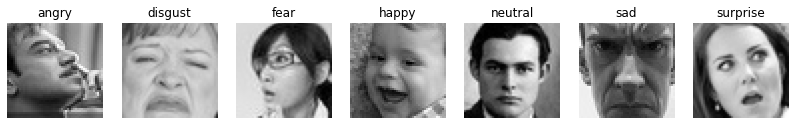

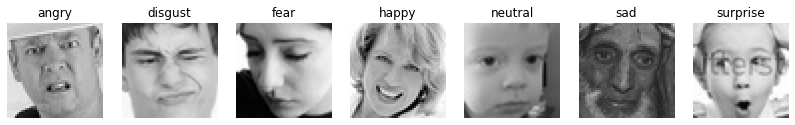

In [11]:
for j in range(5):
    plt.figure(figsize=(14,22))
    i = 1
    for exp_class in os.listdir(train_dir):
        img = load_img((train_dir + exp_class +'/'+ os.listdir(train_dir + exp_class)[j]))
        plt.subplot(1,7,i)
        plt.imshow(img)
        plt.title(exp_class)
        plt.axis('off')
        i += 1
    plt.show()

In [19]:
final_train_data = []
final_target_train = []
for i in range(10):
    img = io.imread((train_dir + 'happy' +'/'+ os.listdir(train_dir + 'happy')[i]))
    final_train_data.append(img)
    final_train_data.append(rotate(img, angle=45, mode = 'wrap'))
    final_train_data.append(np.fliplr(img))
    final_train_data.append(np.flipud(img))
    final_train_data.append(random_noise(img,var=0.1**2))
    for j in range(5):
        final_target_train.append(img)
    img = io.imread((train_dir + 'sad' +'/'+ os.listdir(train_dir + 'sad')[i]))
    final_train_data.append(img)
    final_train_data.append(rotate(img, angle=45, mode = 'wrap'))
    final_train_data.append(np.fliplr(img))
    final_train_data.append(np.flipud(img))
    final_train_data.append(random_noise(img,var=0.1**2))
    for j in range(5):
        final_target_train.append(img)

In [20]:
len(final_train_data)

100

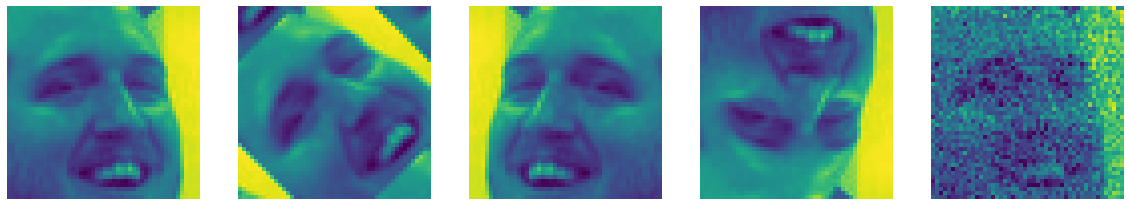

In [16]:
final_train = np.array(final_train_data)
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(final_train[i+30])
    ax[i].axis('off')

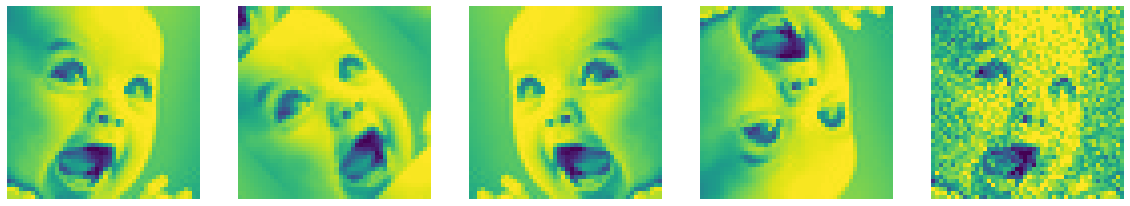

In [28]:
final_train = np.array(final_train_data)
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(final_train[i+50+30])
    ax[i].axis('off')

In [24]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [28]:
train_dir

'FER-2013/train/'